In [ ]:
'''
                                            ** Problem Statement **
    Bicycle, as a model of transportation, has edge on environmental and health issues compared with other means of transproation. 
Therefore, many cities all around the world began to encourage bike usage by providing bike sharing programs, such as Mobike.
Riders can pick up bikes from one spot and return them to other designed place.

- About the dataset:
  The Capital Bike Sharing dataset from UCI contains information about a bike sharing program underway in Washington DC. 
  
  In other words, given this augmented (bike sharing details along with weather information) dataset, 
  can we forecast bike rental demand for this program?
'''

In [80]:
import pandas as pd
import numpy as np

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [3]:
df_hour = pd.read_csv("data/hour.csv")
print(df_hour.shape)

# More than 17k records with 17 attributes.

(17379, 17)


In [4]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [8]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
list(df_hour)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [10]:
# cleans up the attribute names to make them more understandable and pythonic.
df_hour.rename(
    columns = {
     'instant' : "record_id",
     'dteday' : "datetime",
     'holiday' : "is_holiday",
     'workingday' : "is_workingday",
     'weathersit' : "weather_condition",
     'hum' : "humidity",
     'mnth' : "month",
     'cnt' : "total_count",
     'hr' : "hour",
     'yr' : "year"},
    inplace = True )

In [11]:
list(df_hour)

['record_id',
 'datetime',
 'season',
 'year',
 'month',
 'hour',
 'is_holiday',
 'weekday',
 'is_workingday',
 'weather_condition',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_count']

In [12]:
# cleans up the attribute type

df_hour['datetime'] = pd.to_datetime(df_hour.datetime)

df_hour['season'] = df_hour.season.astype('category')
df_hour['is_holiday'] = df_hour.is_holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['weather_condition'] = df_hour.weather_condition.astype('category')
df_hour['is_workingday'] = df_hour.is_workingday.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['hour'] = df_hour.hour.astype('category')


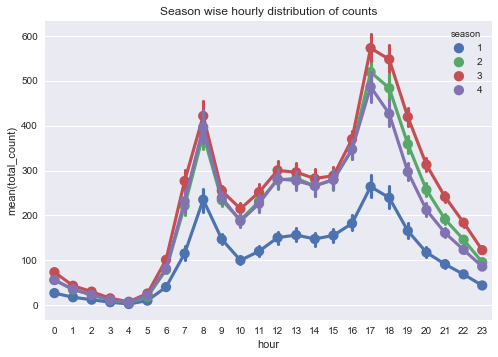

In [81]:
# visualization on hourly ridership counts across the seasons.

fig, ax = plt.subplots()
sns.pointplot(data = df_hour[['hour', 'total_count', 'season']],
             x = 'hour', 
             y = 'total_count', 
             hue = 'season',
             ax = ax)
ax.set(title = "Season wise hourly distribution of counts")


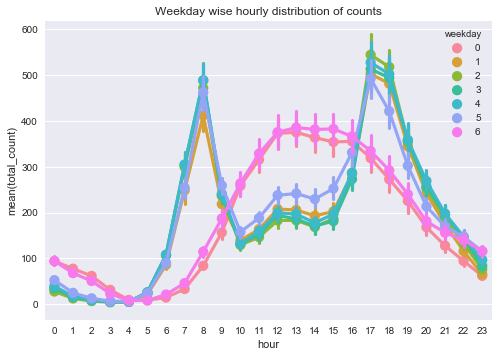

In [82]:
# visualization on weekly ridership counts.

fig, ax = plt.subplots()
sns.pointplot(data = df_hour[['hour', 'total_count', 'weekday']],
             x = 'hour', 
             y = 'total_count', 
             hue = 'weekday',
             ax = ax)
ax.set(title = "Weekday wise hourly distribution of counts")

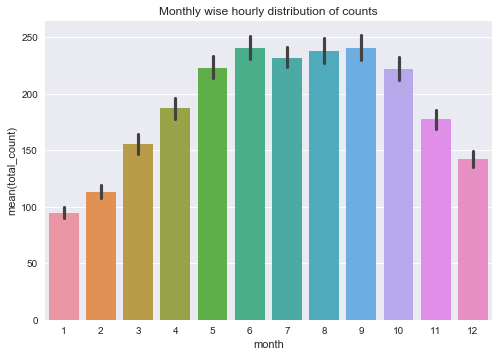

In [85]:
# visualization on monthly ridership counts.

fig, ax = plt.subplots()
sns.barplot(data = df_hour[['month', 'total_count']],
             x = 'month', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Monthly wise hourly distribution of counts")

# The months June-September see highest ridership.

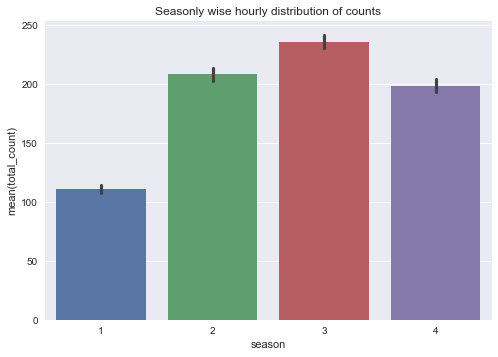

In [86]:
# visualization on seasonly ridership counts.

fig, ax = plt.subplots()
sns.barplot(data = df_hour[['season', 'total_count']],
             x = 'season', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Seasonly wise hourly distribution of counts")

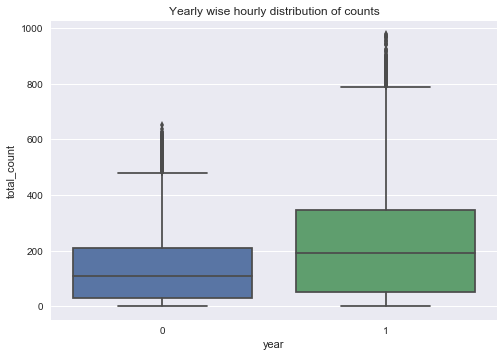

In [88]:
# visualization on yearly ridership counts using Boxplot.

fig, ax = plt.subplots()
sns.boxplot(data = df_hour[['year', 'total_count']],
             x = 'year', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Yearly wise hourly distribution of counts")

# dataset contains year value of 0 representing 2011 and 1 representing 2012. 

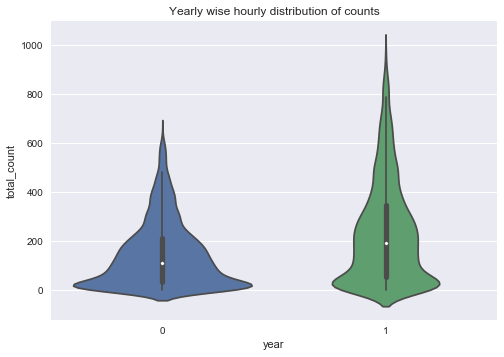

In [89]:
# visualization on yearly ridership counts using Violin plots.
# violin plots with additional ability to visualize probability density of data, which is useful for multimodal data.

fig, ax = plt.subplots()
sns.violinplot(data = df_hour[['year', 'total_count']],
             x = 'year', 
             y = 'total_count', 
             ax = ax)
ax.set(title = "Yearly wise hourly distribution of counts")

# dataset contains year value of 0 representing 2011 and 1 representing 2012. 